# Aprendizagem Supervisionada: Classifição 

<br>

Ao longo deste notebook, iremos discutir a respeito do problema de __classificação.__

Iremos nos basear num famoso dataset online, o __MNIST__, em que cada instância no dataset corresponde a foto de um dígito - entre 0, 1, 2.. 9 - escrito manualmente.

Vamos começar importando os módulos necessários e o dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist["data"], mnist["target"].astype(float)
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X.dtype, y.dtype 

(dtype('float64'), dtype('float64'))

In [5]:
y[:10]

array([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.])

In [6]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

<br>

Vejamos alguns exemplos de dígitos:
    
<br>

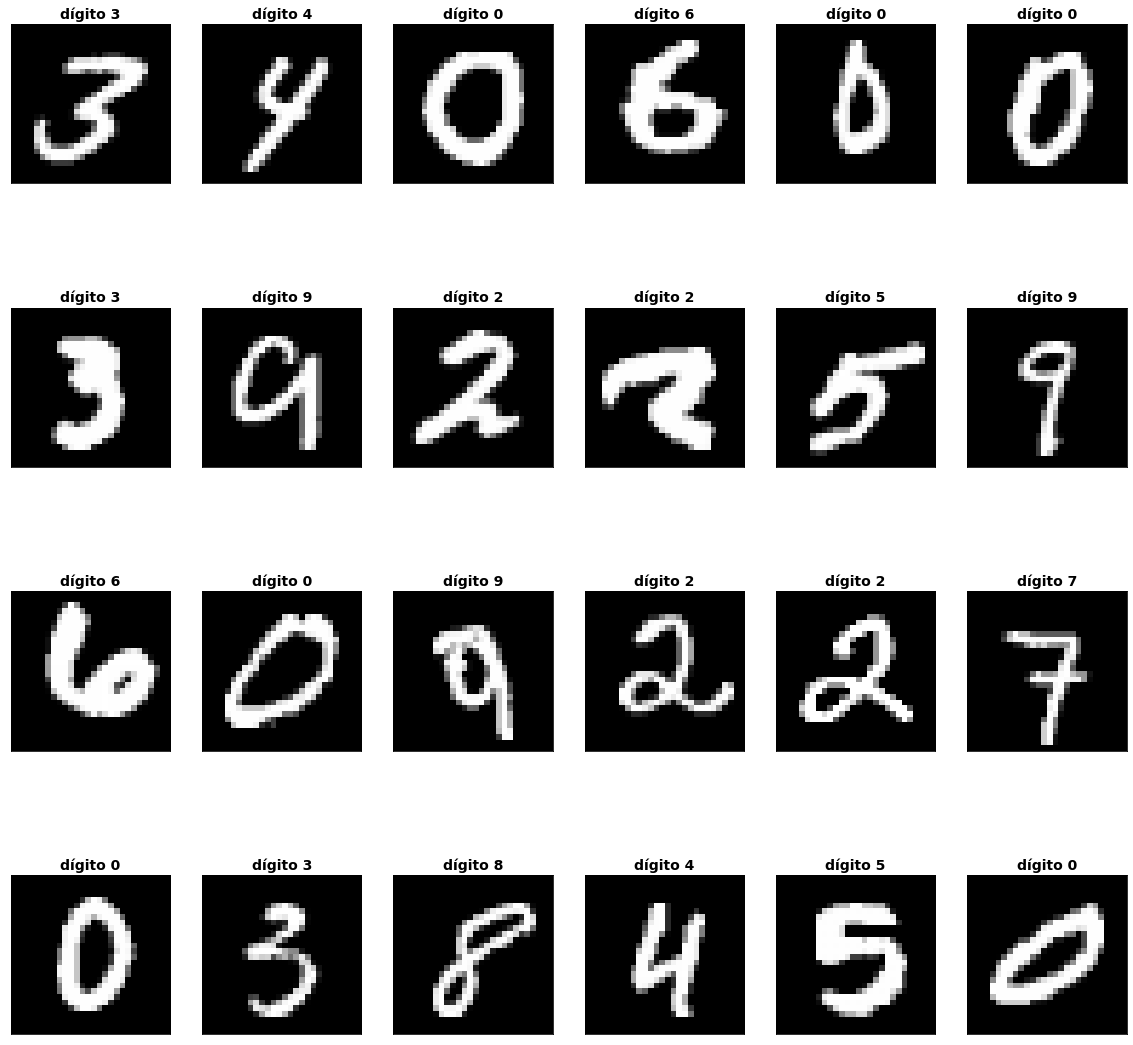

In [7]:
random_idx = np.random.randint(0,X.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = X[idx_i, :].reshape(28,28)
    yval = y[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("dígito "+str(int(yval)), fontsize = 14, fontweight = 'bold')

<br>

Como iremos trabalhar com aprendizado de máquina, sabemos que precisamos reservar parte de nossos dados para o dataset de teste.

O dataset já vem aleatorizado, por isso podemos fazer a divisão conforme:

In [8]:
##55000 instâncias para treino/ 15000 para teste

Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [9]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

## Classificação binária

O objetivo neste primeiro momento é trabalhar com __classificação binária__, isto é, quando a variável target pode assumir apenas dois valores.

No dataset em questão, __iremos classificar se uma certa imagem é do dígito 5 ou não.__

Abaixo, transformamos nossa variável target para assumir 2 valores apenas:

    - irá valer 1 se o dígito for 5;
    
    - irá valer 0 se o dígito não for 5;

In [10]:
ytrain = np.where(ytrain == 5, 1, 0)
ytest = np.where(ytest == 5, 1, 0)

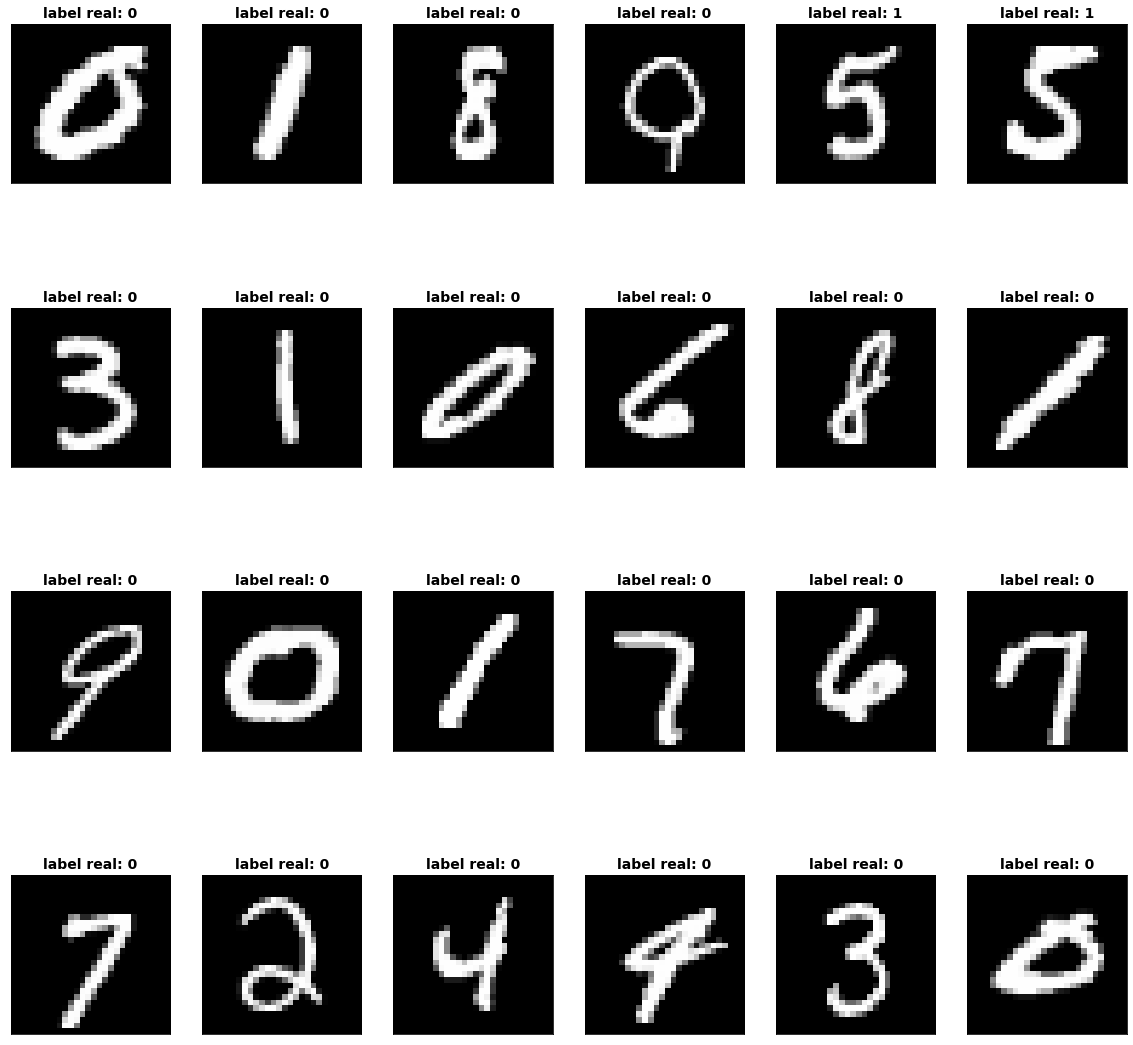

In [11]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

<br>

Acima, temos exemplos do dataset de treino.

Abaixo, plotamos algumas instâncias e cujo objetivo é descobrir - de acordo com modelos de machine learning - se o dígito associado é um 5 ou não.

<br>

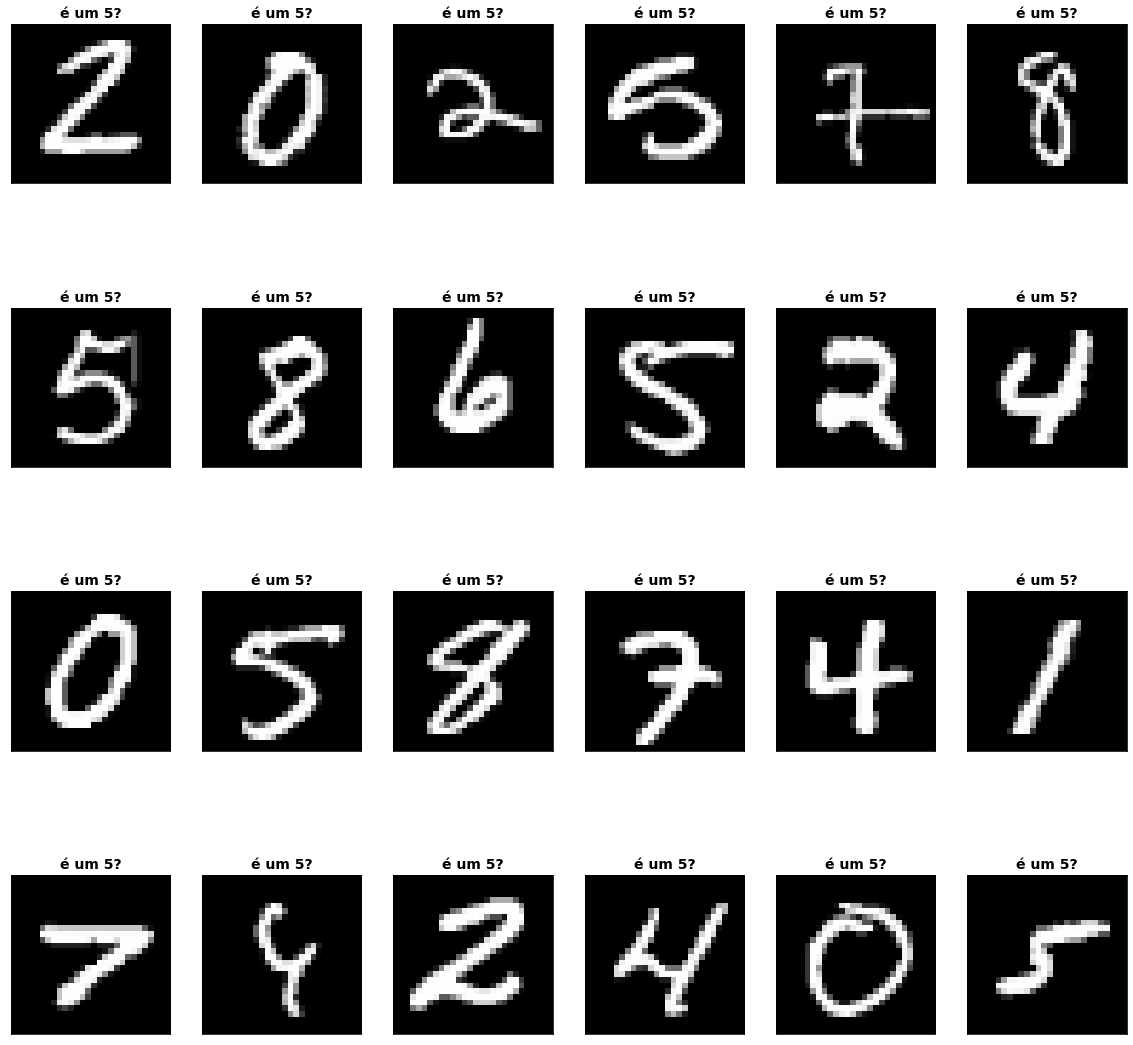

In [12]:
random_idx = np.random.randint(0,Xtest.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtest[idx_i, :].reshape(28,28)
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("é um 5?", fontsize = 14, fontweight = 'bold')
plt.show()

Em problemas de classificação binária, a classe 1 é também conhecida como __classe positiva__. Além disso, na maioria dos problemas de classificação binária temos desbalanceamento entre as classes, isto é, quando a proporção de uma classe é menor do que a outra. Geralmente, a classe positiva é a classe com menos instâncias, ou seja, a classe mais rara.

Vejamos o balanceamento da nossa variável target:

In [13]:
print('Percentual de classe positiva: ',(ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual de classe negativa: ',((ytrain.size-ytrain.sum()) / ytrain.size) * 100, '%')

Percentual de classe positiva:  9.023636363636363 %
Percentual de classe negativa:  90.97636363636363 %


A partir de agora, temos nosso problema bem elaborado.

Já temos o dataset de treinamento e o dataset de teste, entendemos bem nossa variável target e as nomenclaturas nesse contexto.

Nosso próximo passo será __discutir um famoso algoritmo de classificação, a regressão logística!__

<br>

# Regressão Logística 

### Treinando um classificador binário


A regressão logística é um algoritmo usado para __estimar a probabilidade de que uma instância pertence a uma classe em particular.__ Neste contexto, pode ser visto como um algoritmo de classificação binária. Ao estimar a probabilidade, caso essa ultrapasse um certo limiar - geralmente 0.5 - então a classe predita é 1, caso contrário a predição é pela classe 0.

__Como a regressão logística funciona?__

De forma muito similar a regressão linear, a regressão logística calcula uma __combinação linear__ das variáveis de entrada, conforme abaixo. No entanto, o output não é diretamente essa combinação, como no caso da regressão linear, mas sim uma transformação dessa combinação, conhecida como a __logística__:

Considere que estamos diante de um problema de classificação binária e temos k variáveis explicativas disponíveis. A estimativa da probabilidade feita pela regressão logística é dada por: 

$\hat p = \sigma ( \theta_0 + \theta_1 \cdot X_1 + \theta_2 \cdot X_2 + .. + \theta_k \cdot X_k)$

onde $\hat p $ representa a probabilidade estimada.

Ainda, $\sigma$ representa a função sigmoide, cuja expressão é:

$\sigma (t) $ = 1 / (1 + $\exp(-t))$

Dessa forma, a probabilidade estimada pode ser escrita como:

$\hat p  = 1 / (1 + \exp(-1 * (\theta_0 + \theta_1 \cdot X_1 + \theta_2 \cdot X_2 + .. + \theta_k \cdot X_k) ) )$

__Aqui, $\hat p $ representa a probabilidade da instância ser da classe 1; desta forma, o valor  ($1 - \hat p $) representa a probabilidade da instância ser da classe 0.__

Essas fórmulas parecem complicadas, mas vamos entender na prática como a regressão logística funciona.

Vamos começar entendo a __função sigmoide:__

In [14]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

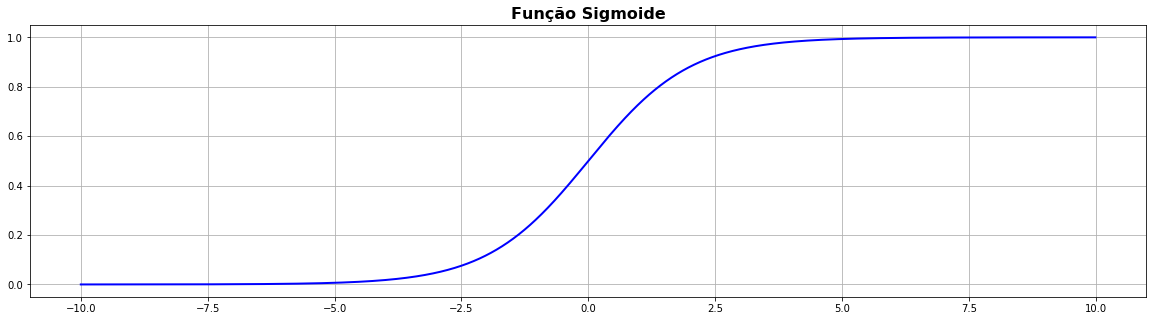

In [15]:
xlims = np.arange(-10,10,0.01)
sigmoid_vals = [sigmoid(x) for x in xlims]

plt.figure(figsize=[20, 5])
plt.title("Função Sigmoide", fontsize = 16, fontweight = 'bold')
plt.plot(xlims, sigmoid_vals, c = 'blue', lw = 2)
plt.grid()
plt.show()

Veja que a função sigmoid assume valores entre 0 e 1. 

A __combinação linear__ $\theta_0 + \theta_1 \cdot X_1 + \theta_2 \cdot X_2 + .. + \theta_k \cdot X_k$ pode assumir qualquer valor, inclusive valores negativos ou maiores do que 1: valores que não fazem sentido em termos de probabilidade.

Ao aplicarmos a função sigmoide na combinação linear, conseguimos garantir que o resultado seja um valor entre 0 e 1, de modo a termos uma __interpretação probabilística__ do resultado.

Tendo os valores de $\theta_0, .. \theta_k$, podemos calcular essa probabilidade para cada instância.

Para a classificação binária, a regra segue:

$y_{pred} = 1$ se $\hat p$ > 0.5; 

$y_{pred} = 0$ caso contrário. 

Aqui 0.5 é o __limiar__ e pode ser alterado!


__Regra de aprendizado da regressão logística:__

A partir de um conjunto de treinamento, o __algoritmo irá aprender os melhores valores de $\theta_0$, .., $\theta_k$.__

Uma vez aprendido esses valores, podemos fazer as predições como discutimos acima.

In [16]:
import time

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
t0 = time.time()

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

tempo (em segundos) para execução:  5.97


Tendo treinado o algorimo, podemos fazer as predições.

Primeiro, vamos acessar os valores de $\theta$:

In [19]:
print(logreg.intercept_)
print(logreg.coef_)

[0.00011244]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.09228820e-06 -9.11248409e-06 -1.68906624e-07 -7.03777599e-09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.68489080e-08 -5.38588016e-08 -4.41904010e-06 -7.97264261e-06
  -1.94416035e-05 -7.79393480e-06 -1.17947781e-05 -1.92128765e-05
  -3.68879436e-04 -3.98664900e-04 -1.50031578e-04 -2.21507483e-04
  -2.45363344e-04 -1.00621963e-04 -1.61875895e-04 -1.72943626e-04
  -9.89525538e-05 -2.26530600e-05 -2.89557272e-06 -2.91290792e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.26831232e-07 -2.30206060e-

In [20]:
logreg.coef_.size

784

Temos 784 coeficientes, mais um intercepto ( $\theta_0$ ), justamente a dimensão de colunas do nosso dataset de treinamento!

Para as predições:

In [21]:
logreg.predict(Xtrain)

array([1, 0, 0, ..., 0, 0, 0])

Para acessar as probabilidades:

In [22]:
logreg.predict_proba(Xtrain)

array([[1.59909578e-01, 8.40090422e-01],
       [9.99878648e-01, 1.21352318e-04],
       [9.99999062e-01, 9.37698771e-07],
       ...,
       [9.91642181e-01, 8.35781854e-03],
       [9.96720096e-01, 3.27990430e-03],
       [9.99729542e-01, 2.70457857e-04]])

In [23]:
logreg.predict_proba(Xtrain).shape

(55000, 2)

Vemos que o array resultante tem 55000 linhas - correspondendo as linhas do dataset de treinamento - e 2 colunas. 
__A primeira coluna representa a probabilidade de ser da classe 0; enquanto que a segunda coluna representa a probabilidade de ser da classe 1.__

Por exemplo, para a primeira instância do dataset de treino, temos:

In [24]:
logreg.predict_proba(Xtrain)[0, ]

array([0.15990958, 0.84009042])

De acordo com o algoritmo, essa instância tem 16% de probabilidade de ser da classe 0 e portanto 84% de ser da classe 1.

In [25]:
ytrain[0]

1

Veja que o classe real dessa instância é 1, de modo que o algoritmo parece ter feito um bom trabalho!

Vamos comparar as predições desse classificador no dataset de treino (abaixo, consideramos apenas as 10 primeiras instâncias):

In [26]:
logreg.predict(Xtrain)[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
ytrain[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

O classificador conseguiu acertar todas!

__Como podemos quantificar, de modo geral, os resultados desse classificador?__

<br>



Para isso, vamos considerar uma __métrica de performance__ para problemas de classificação: a __acurácia__.

Essa métrica nada mais é do que a __quantidade de acertos que tivemos, dividido pelo total de instâncias em que aplicamos o modelo.__

Vamos calcular a acurácia desse classificador abaixo:

In [28]:
predicoes = logreg.predict(Xtrain)

qtd_acertos = (predicoes == ytrain).sum()
total_inst = ytrain.size

acuracia_sgd = qtd_acertos / total_inst
print("acurácia - em dados de treino - da regressão logística foi de : ", acuracia_sgd)

acurácia - em dados de treino - da regressão logística foi de :  0.9772545454545455


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_true = ytrain, y_pred = logreg.predict(Xtrain))

0.9772545454545455

Uau!  98% de acurácia em dados de treino!
Mas.. sabemos que em dados de treino os modelos podem overfitar e não serem capazes de generalizar bem...

<br>

# Validação cruzada: implementação manual

<br>

Vamos na sequência usar __validação cruzada__ para avaliar nosso modelo.

No entanto, iremos __implementar a validação cruzada__ direto no python, para termos mais __controle__ do que podemos fazer. Vejamos abaixo com um exemplo:

In [31]:
X = np.random.randn(20).reshape(10,2).round(2)
X

array([[ 0.45,  0.3 ],
       [ 1.32,  0.07],
       [-0.82,  0.05],
       [-1.96, -0.81],
       [ 1.36, -1.14],
       [ 0.99, -0.12],
       [-0.43, -0.41],
       [ 0.08,  2.24],
       [-0.98,  1.79],
       [ 0.11,  0.16]])

In [32]:
from sklearn.model_selection import KFold

In [33]:
kf = KFold(n_splits=3)

for train_index, val_index in kf.split(X):
    print(train_index, val_index)
    print(X[train_index])
    print()
    print(X[val_index])
    print("-" * 30)

[4 5 6 7 8 9] [0 1 2 3]
[[ 1.36 -1.14]
 [ 0.99 -0.12]
 [-0.43 -0.41]
 [ 0.08  2.24]
 [-0.98  1.79]
 [ 0.11  0.16]]

[[ 0.45  0.3 ]
 [ 1.32  0.07]
 [-0.82  0.05]
 [-1.96 -0.81]]
------------------------------
[0 1 2 3 7 8 9] [4 5 6]
[[ 0.45  0.3 ]
 [ 1.32  0.07]
 [-0.82  0.05]
 [-1.96 -0.81]
 [ 0.08  2.24]
 [-0.98  1.79]
 [ 0.11  0.16]]

[[ 1.36 -1.14]
 [ 0.99 -0.12]
 [-0.43 -0.41]]
------------------------------
[0 1 2 3 4 5 6] [7 8 9]
[[ 0.45  0.3 ]
 [ 1.32  0.07]
 [-0.82  0.05]
 [-1.96 -0.81]
 [ 1.36 -1.14]
 [ 0.99 -0.12]
 [-0.43 -0.41]]

[[ 0.08  2.24]
 [-0.98  1.79]
 [ 0.11  0.16]]
------------------------------


<br>

Apesar de necessitarmos escrever mais cógido para esta validação cruzada manual, veja que dessa forma temos __muito mais controle__ ao treinar os algoritmos.

Com essa forma manual, podemos explicitamente trabalhar __dentro dos folds__, implementando métricas personalizadas e muito mais. Adiante, faremos isso em detalhes!

Agora, retomando para nosso problema:

In [34]:
kf = KFold(n_splits = 5)

In [35]:
t0 = time.time()


classif__ = LogisticRegression() 
lista_acuracia_treino = []
lista_acuracia_validacao = []

for train_index, val_index in kf.split(Xtrain, ytrain):
    
    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain[val_index]
    yval_fold = ytrain[val_index]
    
    classif__.fit(Xtrain_folds, ytrain_folds)
    
    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)
    
    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))
    
    
print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))


t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

acurácias em treino: 
 [0.9766590909090909, 0.9774318181818182, 0.9780227272727273, 0.9780454545454546, 0.9785]  
| média:  0.9777318181818183

acurácias em validação: 
 [0.9763636363636363, 0.9747272727272728, 0.9717272727272728, 0.9732727272727273, 0.9714545454545455]  
| média:  0.9735090909090909
tempo (em segundos) para execução:  26.64


<br>

Vamos agora criar um classificador "ingênuo": ele sempre irá votar pela classe negativa

<br>

In [36]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator): 
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
classif__ = Never5Classifier()


lista_acuracia_treino = []
lista_acuracia_validacao = []


kf = KFold(n_splits = 5)

for train_index, val_index in kf.split(Xtrain, ytrain):
    
    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain[val_index]
    yval_fold = ytrain[val_index]
    
    classif__.fit(Xtrain_folds, ytrain_folds)
    
    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)
    
    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))
    
    
print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))

acurácias em treino: 
 [0.9089772727272727, 0.9097272727272727, 0.91075, 0.9094318181818182, 0.9099318181818182]  
| média:  0.9097636363636363

acurácias em validação: 
 [0.9129090909090909, 0.9099090909090909, 0.9058181818181819, 0.9110909090909091, 0.9090909090909091]  
| média:  0.9097636363636363


Vemos que o __classificador ingênuo teve uma acurácia muito boa__, quase 90% tanto em treinamento quanto nos folds de validação. No entanto, naturalmente não faz sentido usar esse modelo, visto que ele nunca irá acertar a classe positiva.

__Porque esse classificador tem essa acurácia tão alta?__

A resposta é por causa do __desbalanceamento__ das classses. Como vimos, perto de 90% das instâncias são da classe negativa, portanto o classificador que prevê sempre a classe negativa já tem 90% de chance de acertar, isso acarreta numa acurácia de perto de 90%, como vimos.

__Conclusão:__ A acurácia, por si só, não aparenta ser uma métrica muito efetiva para medir a performance dos algoritmos. Vamos na sequência discutir __outras métricas de performance para classificação binária.__

<br>

<br>


# Métricas de Performance: classificação binária (Parte 1) 

## Matriz de confusão
#### (Em inglês, confusion matrix)

A matriz de confusão consiste de uma matriz 2x2, tendo portanto 4 entradas.
Para montarmos essa matriz, precisamos de dois vetores:
    
    - Vetor de predições (binário: 0/1) do algoritmo;
    
    - Vetor da variável target (que, neste caso, também é binária).
    
    
A partir desses dois vetores, podemos responder as seguintes perguntas:

    - Quantas instâncias o algoritmo predisse classe negativa E acertou?
    
    - Quantas instâncias o algoritmo predisse classe positiva E acertou?
    
    - Quantas instâncias o algoritmo predisse classe negativa E errou?
    
    - Quantas instâncias o algoritmo predisse classe positiva E acertou?
    
Cada uma dessas perguntas tem uma resposta quantitativa - isto é, um número - e a matriz de confusão simplesmente apresenta esses 4 números num formato matricial.

Vejamos um exemplo abaixo para fins didáticos:

In [38]:
yreal = np.array([0,0,0,1,1,1,0,0,0,1,0,1,0])
ypredito = np.array([0,1,0,1,0,0,0,1,1,1,0,1,0])

df_matrizConf = pd.DataFrame(np.c_[yreal, ypredito], columns = ['real', 'predito'])
df_matrizConf

,real,predito
0,0,0
1,0,1
2,0,0
3,1,1
4,1,0
5,1,0
6,0,0
7,0,1
8,0,1
9,1,1


- Quantas instâncias o algoritmo predisse classe negativa E acertou?

__Esse número é conhecido como Verdadeiro Negativo__.

In [39]:
df_matrizConf.loc[(df_matrizConf.predito == 0) & (df_matrizConf.real == 0)].shape[0]

5

- Quantas instâncias o algoritmo predisse classe positiva E acertou?

__Esse número é conhecido como Verdadeiro Positivo__.

In [40]:
df_matrizConf.loc[(df_matrizConf.predito == 1) & (df_matrizConf.real == 1)].shape[0]

3

- Quantas instâncias o algoritmo predisse classe negativa E errou?

__Esse número é conhecido como Falso Negativo__.

In [41]:
df_matrizConf.loc[(df_matrizConf.predito == 0) & (df_matrizConf.real == 1)].shape[0]

2

- Quantas instâncias o algoritmo predisse classe positiva E errou?

__Esse número é conhecido como Falso Positivo__.

In [42]:
df_matrizConf.loc[(df_matrizConf.predito == 1) & (df_matrizConf.real == 0)].shape[0]

3

Abaixo, uma figura da matriz de confusão, apresentando sua estrutura:

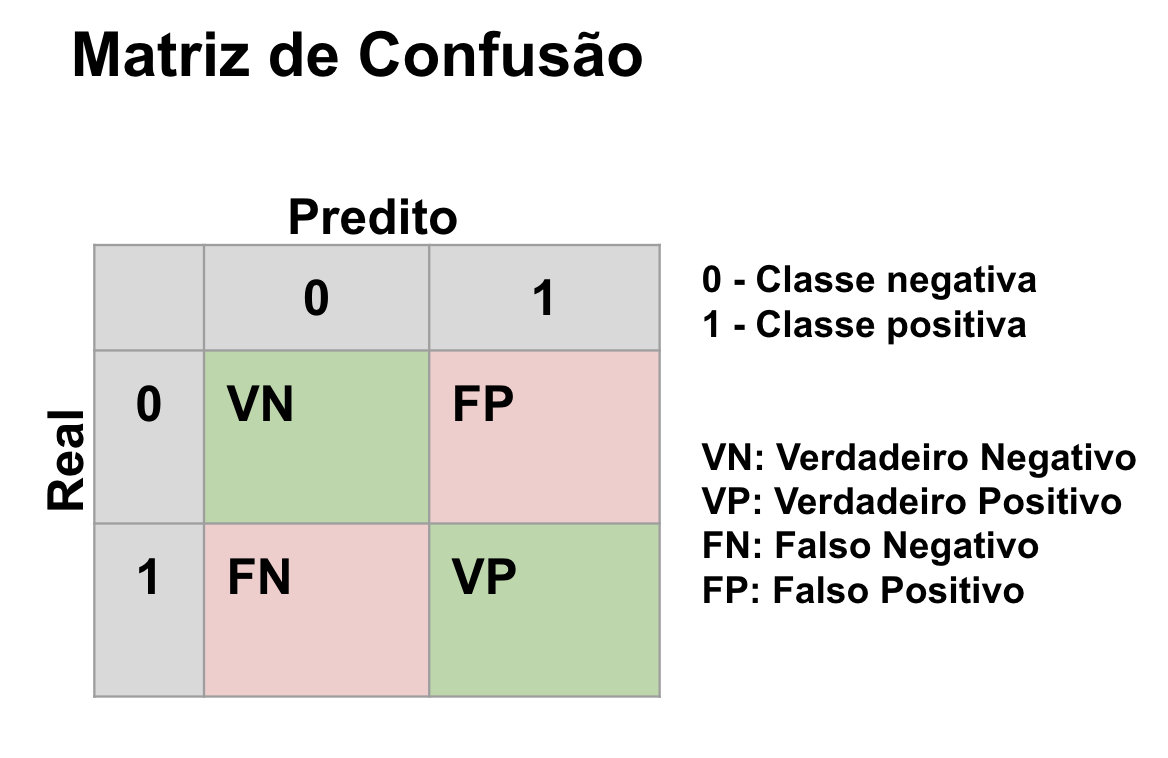

__Podemos calcular a matriz de confusão diretamente do sklearn:__

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_true = yreal, y_pred = ypredito)

array([[5, 3],
       [2, 3]])

<br>

Em particular, veja que a __acurácia pode ser extraída a partir da matriz de confusão:__
    
__Acurácia = (VN + VP) / (VP + FP + FN + VP)__

<br>

No exemplo acima, a acurácia é (5+3) / (5+3+2+3) = 0.615.

Também pode ser calculada diretamente:

In [45]:
(yreal == ypredito).sum() / yreal.size

0.6153846153846154

### Retomando para nosso problema original...

Vamos calcular a matriz de confusão - no dataset de treino - dos dois classificadores criados até então:

In [46]:
logreg = LogisticRegression() 
logreg.fit(Xtrain, ytrain)

confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))

array([[49632,   405],
       [  846,  4117]])

In [47]:
classif__N5 = Never5Classifier()
classif__N5.fit(Xtrain, ytrain)

confusion_matrix(y_true = ytrain, y_pred = classif__N5.predict(Xtrain))

array([[50037,     0],
       [ 4963,     0]])

Aqui, fica evidente que a regressão logística é muito superior ao classificador ingênuo. Alguns pontos:
    
    1- O classificador ingênuo não possui Falso Positivo pois ele nunca vota pela classe positiva; 
    
    2- A quantidade de falso negativos do classif. ingênuo é muito maior;
    
    3- O classif. ingênuo não acerta nenhuma instância da classe positiva (o que é óbvio, pela definição do modelo)
    
Aproveitando os itens discutidos acima, __podemos construir outras métricas de performance.__ Por exemplo, considere as perguntas:

    P1- De todas as instâncias que realmente são classe positiva, 
    quantas um classificador treinado consegue acertar?
    
    P2- De todas as instâncias que um classificador treinado votou pela classe positiva, 
    quantas realmente eram dessa classe?
    
    
    
Para responder a pergunta P1, calculamos: __VP / (VP + FN)__

Para responder a pergunta P2, calculamos: __VP / (VP + FP)__ 

Essas métricas possuem nomes bem conhecidos no contexto de machine learning, de modo que podemos defini-las:

__Recall = __VP / (VP + FN)__

__Precision = VP / (VP + FP)__


Ainda nesse tema, temos a seguinte __interpretação probabilística dessas métricas:__

__Recall = Dada uma instância que é da classe positiva, a recall do classificador é a probabilidade do mesmo acertar a classe.__

__Precision = Dado que um classificador votou uma instância sendo da classe positiva, a precision é a probabilidade dessa instância realmente ser dessa classe.__



Vamos abaixo calcular a precison e recall dos classificadores acima:

In [48]:
cm1 = confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))
cm1

array([[49632,   405],
       [  846,  4117]])

In [49]:
#Recall:

cm1[1,1] / cm1[1, :].sum()

0.8295385855329438

In [50]:
#Precision:

cm1[1,1] / cm1[:, 1].sum()

0.910437859354268

In [51]:
cm2 = confusion_matrix(y_true = ytrain, y_pred = classif__N5.predict(Xtrain))
cm2

array([[50037,     0],
       [ 4963,     0]])

In [52]:
#Recall:

cm2[1,1] / cm2[1, :].sum()

0.0

In [53]:
#Precision:

cm2[1,1] / cm2[:, 1].sum()

nan

__Precision para classif. ingênuo = 0 / (0 + 0) = indeterminação; assumimos neste caso que  é 0.__

__Também podemos calcular dirementamente pelo sklearn:__

In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
print("LogReg:")
print('Recall: ', recall_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('Precison: ', precision_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print()
print("Classif. ingênuo:")
print('Recall: ', recall_score(y_true = ytrain, y_pred = classif__N5.predict(Xtrain)))
print('Precison: ', precision_score(y_true = ytrain, y_pred = classif__N5.predict(Xtrain)))

LogReg:
Recall:  0.8295385855329438
Precison:  0.910437859354268

Classif. ingênuo:
Recall:  0.0
Precison:  0.0



# Métricas de Performance: classificação binária (Parte 2) 

<br>

Uma __outra métrica__ para classificação binária muito interessante é o __F1 Score__. 

Essencialmente, o __F1__ é a __média harmônica__ entre a __precision__ e a __recall__. Como consequência da definição, o F1 será alto apenas se ambos precision e recall também forem altos.

Sua fórmula é:

   
__F1 = 2 x  (precision x recall) / (precision + recall)__


Assim como a precision e a recall, o range de valores possíveis para o F1 é entre 0 e 1, sendo que quanto maior, melhor.

In [56]:
from sklearn.metrics import f1_score

In [57]:
print('F1 Score - reg. logística: ', f1_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('F1 Score - classif. ingênuo: ', f1_score(y_true = ytrain, y_pred = classif__N5.predict(Xtrain)))

F1 Score - reg. logística:  0.8681075382182393
F1 Score - classif. ingênuo:  0.0


Vamos abaixo reimplementar nossa validação cruzada considerando essas novas métricas:

In [58]:
def validacao_cruzada(classificador, 
                      X, 
                      y, 
                      metrica, 
                      num_folds, 
                      print_info = False, 
                      nome_metrica = None):
    
    lista_metrica_treino = []
    lista_metrica_validacao = []
    
    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(X, y):
        
        Xtrain_folds = X[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X[val_index]
        yval_fold = y[val_index]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)
        
        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
        
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
        
    return lista_metrica_treino, lista_metrica_validacao

__Avaliando a regressão logística nas métricas precision, recall e F1:__

In [59]:
t0 = time.time()

for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = LogisticRegression(),
                 X = Xtrain, 
                 y = ytrain, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()
    
t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

Métrica: Precision
média treino: 0.9148850652272887
média validação: 0.8894138093757942

Métrica: Recall
média treino: 0.8305035869053871
média validação: 0.8071543117962037

Métrica: F1
média treino: 0.8706496759331916
média validação: 0.8462464871420229

tempo (em segundos) para execução:  73.27


__Avaliando o classificador ingênuo:__

In [60]:
for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = Never5Classifier(),
                 X = Xtrain, 
                 y = ytrain, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()

Métrica: Precision
média treino: 0.0
média validação: 0.0

Métrica: Recall
média treino: 0.0
média validação: 0.0

Métrica: F1
média treino: 0.0
média validação: 0.0



Uma palavra final sobre o F1: __o score F1 favorece classificadores que possuam precision e recall similares.__

No entanto, nem sempre é isso o que queremos. Considere os exemplos:

1- Queremos classificar vídeos que sejam  seguros para crianças. Neste caso, considere que a classe positiva - target = 1 - significa que o vídeo é seguro. 
Cometer um Falso Positivo neste caso significa que prevemos que um vídeo é seguro, sendo que não é. Cometer um Falso Negativo significa prever que um vídeo não é seguro, sendo que é. Neste caso, claramente o Falso Positivo é pior, pois estaríamos mostrando um vídeo não seguro para crianças. Desta forma, a métrica a ser otimizada neste caso é a precision: queremos ter uma pequena quantidade de falso positivos!

2- Queremos detectar ladrões em câmeras de segurança. Neste caso, considere que a classe positiva é se a pessoa é um ladrão. Aqui, Falso Positivo é acusar que alguém é ladrão sendo que não é. Já o falso negativo é inocentar um ladrão. Desta forma, o falso negativo é prioritário, pois queremos minimizar a quantidade de roubos. Desta forma, a métrica a ser otimizada é a recall: queremos uma pequena quantidade de falso negativos!

__Existe um TRADE-OFF entre precision e recall:__ ao tentarmos otimizar uma delas, automaticamente a outra é prejudicada. Vamos discutir este trade-off em detalhes.




# Trade-Off precision e recall

<br>

Abaixo, estamos fitando o modelo de reg. logística no conjunto de treinamento e também prevendo as classes (0/1) para cada instância no conjunto de treino.

In [61]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
logreg.predict(Xtrain)[:50] #predições das primeiras 50 instâncias de treino

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0])

Como calcular essas probabilidades?

Podemos responder a essa pergunta como segue:

In [63]:
logreg.predict_proba(Xtrain)

array([[1.59909578e-01, 8.40090422e-01],
       [9.99878648e-01, 1.21352318e-04],
       [9.99999062e-01, 9.37698771e-07],
       ...,
       [9.91642181e-01, 8.35781854e-03],
       [9.96720096e-01, 3.27990430e-03],
       [9.99729542e-01, 2.70457857e-04]])

A primeira coluna indica a probabilidade de cada uma das instâncias de treino ser da classe 0, enquanto que a segunda coluna é a probabilidade de cada instância ser classe 1. Naturalmente, a soma (em cada linha) é 1, visto que cada instância pode ser ou classe 0 ou classe 1, apenas.

In [64]:
#vetor com as probabilidades de classe 1 para todas as instâncias de treino

prob_class_1 = logreg.predict_proba(Xtrain)[:, 1]

Veja que a regra de predição da regressão logística "original" é a seguinte: 

    - y_pred = 1 se a probabilidade da classe 1 for MAIOR do que 0.5
    - y_pred = 0 se a probabilidade da classe 1 for MENOR do que 0.5

In [65]:
np.where(prob_class_1 > 0.5, 1, 0)

array([1, 0, 0, ..., 0, 0, 0])

In [66]:
logreg.predict(Xtrain)

array([1, 0, 0, ..., 0, 0, 0])

__Conclusão:__ A regressão logística - assim como vários outros modelos de machine learning para classificação - retorna um __score__ (probabilidade da classe positiva). Através desse score, podemos ter a regra de classificação binária do modelo. Na forma original, se o score for acima de 0.5, a votação é pela classe positiva; se for abaixo, a votação é pela classe negativa. Aqui, o valor 0.5 é também conhecido como __limiar__ ou __threshold__ (em inglês).



No entanto, __podemos alterar a regra de classificação binária manipulando o limiar!__. Por exemplo, podemos definir que o limiar seja de 0.3, de modo que a predição final será da classe positiva se e somente se o score for acima de 0.3.

__Importante:__ Ao alterar o limiar, as métricas irão mudar! Ou seja, __acurácia, precision, recall e F1__ são todos __dependentes do limiar.__


Abaixo, vamos rodar um loop nos limiares (de 0 até 1) e ver como as métricas precision e recall se comportam:

In [67]:
limiares = np.linspace(0.05,0.95,19)
limiares

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

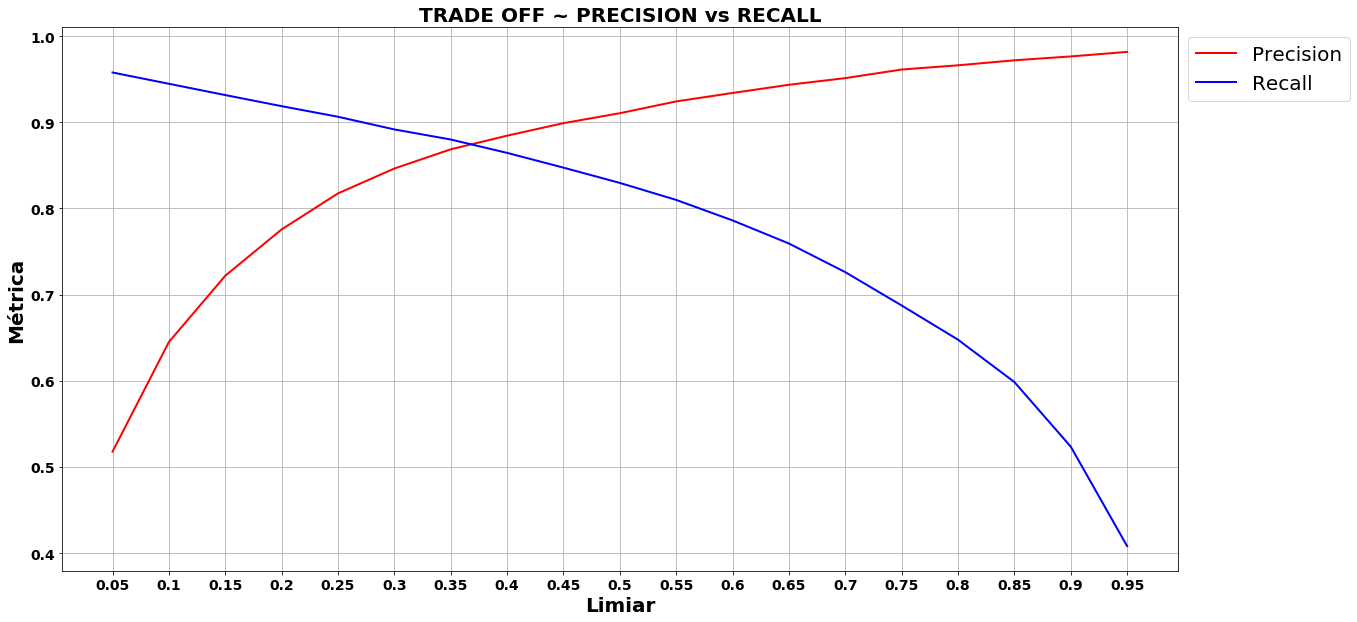

In [68]:
precision_list = []
recall_list = []

for t in limiares:
    
    pred_t = np.where(prob_class_1 > t, 1, 0)
    
    precision_t = precision_score(y_true = ytrain, y_pred = pred_t)
    recall_t = recall_score(y_true = ytrain, y_pred = pred_t)
    
    precision_list.append(precision_t)
    recall_list.append(recall_t)
    
    
plt.figure(figsize=[20,10])
plt.plot(range(len(limiares)), precision_list, c = 'red', label = 'Precision', lw = 2)
plt.plot(range(len(limiares)), recall_list, c = 'blue', label = 'Recall', lw = 2)
plt.xticks(range(len(limiares)), limiares.round(2), fontweight = 'bold', fontsize = 14)
plt.yticks(fontweight = 'bold', fontsize = 14)
plt.legend(fontsize = 20, bbox_to_anchor = [1,1])
plt.grid()
plt.xlabel("Limiar", fontsize = 20, fontweight = 'bold')
plt.ylabel("Métrica", fontsize = 20, fontweight = 'bold')
plt.title("TRADE OFF ~ PRECISION vs RECALL", fontsize = 20, fontweight = 'bold')
plt.show()

Ao variar os limiares, fica evidente - do gráfico acima - que as métricas precision e recall variam bastante.

Em particular, vemos o __trade off entre a precision e recall:__ 

    - Ao aumentarmos o valor do limiar, a precision tende a aumentar enquanto a recall tende a cair;
    
    - Ao diminuirmos o valor do limiar, a precision tende a diminuir enquanto a recall tende a aumentar.
    

Ainda, __gráficos como este acima podem ser muito úteis na hora de decidir qual o melhor limiar para um certo problema em questão.__

Outro gráfico muito interessante neste contexto segue abaixo. Este gráfico é conhecido como __curva precision vs recall.__  Também fica evidente que ao aumentarmos uma das métricas, acabamos por diminuir a outra.

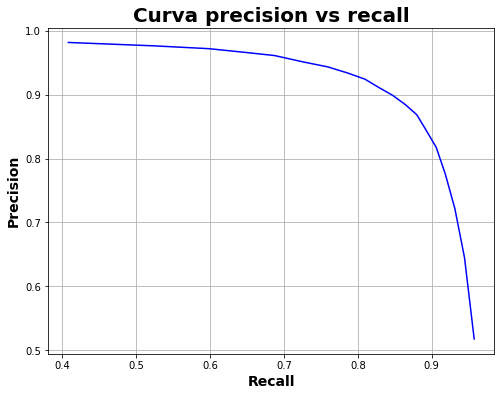

In [69]:
plt.figure(figsize=[8,6])
plt.plot(recall_list, precision_list, c = 'blue')
plt.xlabel("Recall", fontsize = 14, fontweight = 'bold')
plt.ylabel("Precision", fontsize = 14, fontweight = 'bold')
plt.title("Curva precision vs recall", fontsize = 20, fontweight = 'bold')
plt.grid()
plt.show()

<br>

Vejamos abaixo que, ao variar o valor do threshold, a confusion matrix é também afetada:

In [70]:
for t in np.arange(0.1, 1.0, 0.1): 
    print('limiar: ', np.round(float(t), 2))
    print("confusion matrix:" )
    preds = np.where(prob_class_1 > t, 1, 0)
    print(confusion_matrix(y_pred = preds, y_true = ytrain))
    print('======================= \n')

limiar:  0.1
confusion matrix:
[[47456  2581]
 [  275  4688]]

limiar:  0.2
confusion matrix:
[[48718  1319]
 [  404  4559]]

limiar:  0.3
confusion matrix:
[[49233   804]
 [  538  4425]]

limiar:  0.4
confusion matrix:
[[49476   561]
 [  673  4290]]

limiar:  0.5
confusion matrix:
[[49632   405]
 [  846  4117]]

limiar:  0.6
confusion matrix:
[[49761   276]
 [ 1062  3901]]

limiar:  0.7
confusion matrix:
[[49852   185]
 [ 1360  3603]]

limiar:  0.8
confusion matrix:
[[49924   113]
 [ 1749  3214]]

limiar:  0.9
confusion matrix:
[[49974    63]
 [ 2365  2598]]



__Agora que já discutimos bastante a respeito de métricas de classificação, vamos retornar para nosso problema.__

# Escolhendo o melhor limiar 

Vamos considerar que queremos maximizar o __F1__. 

Como podemos escolher o melhor limiar usando validação cruzada?

In [71]:
#adaptação da função validacao_cruzada 
def validacao_cruzada(classificador, 
                      X, 
                      y, 
                      metrica, 
                      num_folds, 
                      limiar = 0.5, 
                      print_info = False, 
                      nome_metrica = None):
    
    lista_metrica_treino = []
    lista_metrica_validacao = []
    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(X, y):
        Xtrain_folds = X[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X[val_index]
        yval_fold = y[val_index]
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        #alteração nesta parte! agora, primeiro calculamos a probabilidade e na sequência usamos o valor do limiar
        prob_class1_treino = classificador.predict_proba(Xtrain_folds)[:,1]
        prob_class1_validacao = classificador.predict_proba(Xval_fold)[:,1]
        pred_treino = np.where(prob_class1_treino > limiar, 1, 0)
        pred_validacao = np.where(prob_class1_validacao > limiar, 1, 0)
        
        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
    return lista_metrica_treino, lista_metrica_validacao

Vamos testar essa função para alguns valores de limiar:
    
<br>

In [72]:
print("Testando o limiar 0.5:")
lt, lv = validacao_cruzada(classificador = LogisticRegression(), 
                           X = Xtrain, 
                           y = ytrain, 
                           metrica = f1_score,
                           num_folds = 5, 
                           limiar = 0.5,
                           print_info = True, 
                           nome_metrica = 'F1')

Testando o limiar 0.5:
Métrica: F1
média treino: 0.8706496759331916
média validação: 0.8462464871420229


In [73]:
print("Testando o limiar 0.15:")
lt, lv = validacao_cruzada(classificador = LogisticRegression(), 
                           X = Xtrain, 
                           y = ytrain, 
                           metrica = f1_score,
                           num_folds = 5, 
                           limiar = 0.15,
                           print_info = True, 
                           nome_metrica = 'F1')

Testando o limiar 0.15:
Métrica: F1
média treino: 0.8131500224669448
média validação: 0.7966277861962959


Veja que como variar o limiar - neste caso, 0.15 ou 0.5 - os valores de F1 são bem afetados!


Vamos abaixo rodar um loop nos limiares e analisar o F1 para cada caso:

In [74]:
# lista_media_metrica_treino = []
# lista_media_metrica_validacao = []

# t0 = time.time()

# for t in limiares:
    
#     lt, lv = validacao_cruzada(classificador = LogisticRegression(), 
#                                X = Xtrain, 
#                                y = ytrain, 
#                                metrica = f1_score,
#                                num_folds = 5, 
#                                limiar = t)
    
#     lista_media_metrica_treino.append(np.mean(lt))
#     lista_media_metrica_validacao.append(np.mean(lv))
    
# plt.figure(figsize=[8,6])
# plt.plot(range(len(limiares)), lista_media_metrica_treino, c = 'red', label = 'F1 médio - TREINO', lw = 2)
# plt.plot(range(len(limiares)), lista_media_metrica_validacao, c = 'blue', label = 'F1 médio - VALIDAÇÃO', lw = 2)
# plt.xticks(range(len(limiares)), limiares.round(2))
# plt.legend(fontsize = 14, bbox_to_anchor = [1,1])
# plt.grid()
# plt.xlabel("Limiar", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Valor", fontsize = 14, fontweight = 'bold')
# plt.title("Dispersão do F1 (cross-val.) por limiar - Reg. Logística", fontsize = 16, fontweight = 'bold')
# plt.show()

# t1 = time.time()
# print(t1-t0)

De acordo com o gráfico, __podemos escolher o limiar com o maior valor no conjunto de validação!__

Comentário: Ao testar outros algoritmos - por exemplo, versões do KNN - os limiares podem mudar. Um limiar ótimo para um algoritmo não garante que será esse mesmo o limiar ótimo em outro algoritmo.

<br>

# Métricas de Performance: classificação binária (Parte 3) 


<br>

Uma outra métrica muito comum no contexto de __classificação binária__ é a __Curva ROC.__

É uma curva muito similar a curva de precisão e recall, no entanto ela plota a __taxa de verdadeiros positivos__ (que é outro nome para a recall) versus a __taxa de falsos positivos:__

__TVP = Recall = VP / (VP + FN)__

__TFP = taxa de instâncias negativas que foram classificadas como positivas = FP / (VN + FP)__


Assim como na curva de precision vs recall, para cada limiar definido podemos calcular TVP e TFP. No caso da curva ROC, plotamos esses valores. Vejamos abaixo no código:

In [75]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
from sklearn.metrics import roc_curve

In [77]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1]) 

#fpr = false positive rate = taxa de falso positivos
#tpr = true positive rate = taxa de verdadeiro positivos
#thresholds = limiares usados

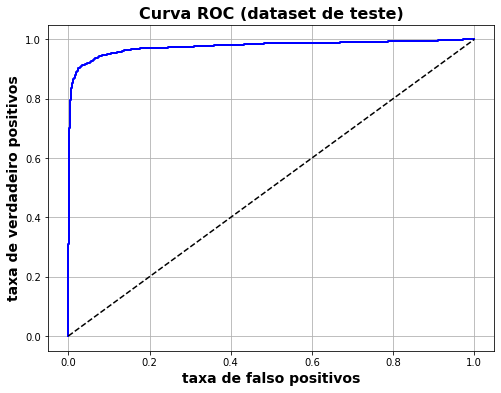

In [78]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

A curva ROC acaba sendo uma métrica muito visual. Para quantificarmos um valor associado a ela, é muito interessante calcularmos a __área sobre a curva ROC.__ Essa métrica é também conhecida como __AUC-ROC: area under curve ROC.__

A AUC varia entre 0 e 1, sendo que 1 é o melhor valor possível.

No gráfico, a linha pontilhada corresponde a um classificador aleatório, isto é, um modelo sem inteligência que vota 0 ou 1 de forma totalmente aleatória. Neste caso, a AUC do classificador aleatório é 0.5. __Quanto maior for a área entre a linha pontilhada e a curva ROC do algoritmo, melhor sua performance!__

Usando o sklearn:

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

0.9765502102835436

In [81]:
random_classifier = np.random.choice(a = [0,1], size = ytest.size, replace = True)

roc_auc_score(y_true = ytest, y_score = random_classifier)

0.49641839641839647

<br>

# Classificação MultiClasse 

<br>

Na classificação binária, a variável target possui apenas duas categorias. No caso da __classificação multiclasse__, a variável target possui mais do que duas categorias.

Um exemplo neste contexto é o dataset que estamos trabalhando até então, o MNIST. Até o momento, nosso trabalho era prever se um dígito era 5 ou não (classificação binária), mas podemos simplesmente prever qual o dígito da figura. Neste caso, teremos 10 classes distintas: 0, 1, 2, ..., 8, 9; estamos assim diante de uma classificação multiclasse.

Alguns algoritmos de machine learning trabalham diretamente com classificação multiclasse, o KNN sendo um exemplo. Outro exemplo são os algoritmos baseados em árvores, que estudaremos em módulos futuros.

No caso da regressão logística, o algoritmo é estritamente construído para classificação binária. No entanto, é possível fazermos algumas adaptações para considerarmos também o caso multiclasse.

A principal estratégia usada neste caso é:

__One versus Rest (OvR):__

Aqui, se a variável target possui N categorias (sendo N = 3, 4, 5.. etc), treinamos N classificadores binários, um para cada uma dessas categorias. 

Por exemplo, no MNIST dataset para classificação de dígitos, treinaremos 10 classificadores, um cada para reconhecer cada dígito.

Após isso, a predição é feita da seguinte forma: cada classificador gera um score - probabilidade de ser da classe positiva - e a predição final é feita para o dígito que tiver maior score.

Na implementação do algoritmo pelo scikit-learn, a regressão logística possui um parâmetro "multi_class", cujo valor padrão é "ovr", justamente para já poder trabalhar com classificações multiclasse.

__LogisticRegression(multi_class = 'ovr')__

In [82]:
#reimportando os dados - para termos os 10 dígitos

X, y = mnist["data"], mnist["target"].astype(float)
print(X.shape, y.shape)
print(np.unique(y))

(70000, 784) (70000,)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [83]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [84]:
#treinando a regressão logística com as 10 classes

t0 = time.time()

logreg = LogisticRegression(multi_class = 'ovr') #já é a parametrização padrão
logreg.fit(Xtrain, ytrain)

t1 = time.time()
print(t1-t0)

32.74258089065552


In [85]:
# avaliando as predições nos dados de teste

logreg.predict(Xtest)[:20]

array([1., 4., 8., 7., 4., 4., 0., 9., 3., 9., 5., 3., 6., 9., 1., 1., 6.,
       3., 6., 6.])

In [86]:
logreg.predict_proba(Xtest)[:20]

array([[4.12114001e-04, 8.59418325e-01, 5.39284856e-02, 1.63175736e-02,
        1.46195466e-03, 7.10253728e-04, 1.58794795e-03, 2.08286757e-03,
        6.36700543e-02, 4.10423899e-04],
       [1.36091272e-06, 3.48450720e-12, 4.68457675e-01, 9.18962914e-03,
        5.19580578e-01, 2.12521195e-03, 6.36446227e-04, 4.27541787e-11,
        2.31533436e-06, 6.78385701e-06],
       [3.01974250e-03, 4.07038942e-03, 2.99540667e-04, 3.14513937e-02,
        9.79861484e-06, 3.15506341e-01, 6.42098690e-05, 1.29263321e-05,
        6.45185991e-01, 3.79667459e-04],
       [1.41967974e-02, 1.82084700e-09, 1.18905126e-07, 5.88698488e-04,
        2.63647520e-03, 1.67278788e-04, 2.68322288e-11, 7.67681166e-01,
        1.82996838e-05, 2.14711163e-01],
       [1.31525867e-06, 1.82872957e-08, 5.64641755e-06, 1.03557063e-05,
        9.01942668e-01, 1.79521077e-02, 1.45261384e-06, 5.09631998e-04,
        7.26390135e-02, 6.93779072e-03],
       [5.22172791e-05, 1.12149840e-05, 1.16950103e-02, 1.24773523e-05,
   

In [87]:
pd.DataFrame(np.c_[logreg.predict_proba(Xtest), logreg.predict(Xtest)]).round(4).head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0004,0.8594,0.0539,0.0163,0.0015,0.0007,0.0016,0.0021,0.0637,0.0004,1.0
1,0.0000,0.0000,0.4685,0.0092,0.5196,0.0021,0.0006,0.0000,0.0000,0.0000,4.0
2,0.0030,0.0041,0.0003,0.0315,0.0000,0.3155,0.0001,0.0000,0.6452,0.0004,8.0
3,0.0142,0.0000,0.0000,0.0006,0.0026,0.0002,0.0000,0.7677,0.0000,0.2147,7.0
4,0.0000,0.0000,0.0000,0.0000,0.9019,0.0180,0.0000,0.0005,0.0726,0.0069,4.0
5,0.0001,0.0000,0.0117,0.0000,0.8111,0.0002,0.0199,0.0001,0.1564,0.0005,4.0
6,0.9631,0.0000,0.0001,0.0006,0.0000,0.0000,0.0017,0.0000,0.0345,0.0000,0.0
7,0.0005,0.0000,0.0000,0.0000,0.0034,0.0022,0.0000,0.0016,0.0191,0.9732,9.0
8,0.0000,0.0000,0.0004,0.9995,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,3.0
9,0.0000,0.0000,0.0000,0.0000,0.0173,0.0000,0.0000,0.0080,0.0002,0.9745,9.0


Acima, vemos que a função predict retorna as classes preditas, entre 0 e 9. Já a predict_proba retorna um array, contendo a probabilidade da instância ser de cada uma das classes. Neste caso, a votação final (o resultado da função predict) é justamente a classe com a maior probabilidade, como podemos ver no dataframe acima.

Finalmente, vamos discutir sobre __métricas de performance para classificação multiclasse:__

Neste contexto, a __matriz de confusão__ é muito utilizada, só que agora sua dimensão é NxN, em que N é o número de categorias. No caso do nosso exemplo de dígitos, a matriz de confusão será 10x10.

Além disso, existem variações das métricas precision, recall e F1, como segue abaixo.

In [88]:
cm = confusion_matrix(y_true = ytest, y_pred = logreg.predict(Xtest))
cm

array([[1427,    0,    4,    4,    3,    3,   11,    5,    9,    3],
       [   0, 1637,    4,    1,    0,    1,    4,    1,   16,    1],
       [   9,   13, 1362,   28,   13,    7,   13,   16,   61,    3],
       [   5,    2,   29, 1383,    4,   33,    6,   12,   34,   11],
       [   2,    8,    6,    4, 1385,    0,   12,    4,   17,   43],
       [  19,    4,    4,   60,   12, 1148,   28,    9,   49,   17],
       [  10,    4,   10,    3,    5,   16, 1382,    1,    9,    0],
       [   4,    8,   26,    9,    9,    1,    1, 1483,    4,   46],
       [  11,   25,   11,   31,   15,   40,    9,   18, 1287,   21],
       [  10,    8,    4,   20,   42,    3,    0,   38,   25, 1342]])

In [89]:
pd.DataFrame(cm,
             columns = ['pred_digito ' + str(i) for i in range(10)], 
             index = ['digito_real  ' + str(i) for i in range(10)])

,pred_digito 0,pred_digito 1,pred_digito 2,pred_digito 3,pred_digito 4,pred_digito 5,pred_digito 6,pred_digito 7,pred_digito 8,pred_digito 9
digito_real 0,1427,0,4,4,3,3,11,5,9,3
digito_real 1,0,1637,4,1,0,1,4,1,16,1
digito_real 2,9,13,1362,28,13,7,13,16,61,3
digito_real 3,5,2,29,1383,4,33,6,12,34,11
digito_real 4,2,8,6,4,1385,0,12,4,17,43
digito_real 5,19,4,4,60,12,1148,28,9,49,17
digito_real 6,10,4,10,3,5,16,1382,1,9,0
digito_real 7,4,8,26,9,9,1,1,1483,4,46
digito_real 8,11,25,11,31,15,40,9,18,1287,21
digito_real 9,10,8,4,20,42,3,0,38,25,1342


Acima, temos a matriz de confusão do exemplo, sua interpretação é a mesma que o caso de clssificação binária.

Para usarmos as métricas de precision, recall e F1, precisamos de algumas adaptações simples.

Por exemplo, considere a pergunta:

__Qual seria a precision da classe 0?__

__Em outras palavras, de todas as instâncias que foram preditas como classe 0, qual o percentual dessas que realmente é classe 0?__

Podemos calcular isso da seguinte forma:

In [90]:
prec_0 = cm[0,0] / cm[:, 0].sum()
prec_0

0.9532398129592519

Analogamente, podemos perguntar pela __recall da classe 0: de todas as instâncias que realmente são da classe 0, qual o percentual delas que nosso algoritmo consegue acertar__

In [91]:
recall_0 = cm[0,0] / cm[0, :].sum()
recall_0

0.9714091218515998

Finalmente, podemos calcular o __F1 score da classe 0:__

__F1_class_0 = (2 * prec_0 * recall_0) / (prec_0 + recall_0)__

In [92]:
(2 * prec_0 * recall_0) / (prec_0 + recall_0)

0.9622387053270397

Podemos fazer o mesmo para as outras categorias!

Na prática, usamos diretamente o scikit-learn para isso. Só precisamos alterar um parâmetro nas funções:

In [93]:
precision_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None)

array([0.95323981, 0.9578701 , 0.93287671, 0.8963059 , 0.93077957,
       0.91693291, 0.94270123, 0.93446755, 0.85175381, 0.90248823])

In [94]:
recall_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None)

array([0.97140912, 0.98318318, 0.89311475, 0.91046741, 0.93517893,
       0.85037037, 0.95972222, 0.93211816, 0.876703  , 0.89946381])

In [95]:
f1_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None)

array([0.96223871, 0.97036159, 0.91256281, 0.90333116, 0.93297407,
       0.88239816, 0.95113558, 0.93329138, 0.86404834, 0.90097348])

Finalmente, podemos ter um __consolidado dessas métricas:__

In [96]:
prec_final = precision_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None).mean()
recall_final = recall_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None).mean()
f1_final = f1_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None).mean()

print("Precision Final (média): ", np.round(prec_final,4))
print("Recall Final (média): ", np.round(recall_final,4))
print("F1 Final (média): ", np.round(f1_final,4))

Precision Final (média):  0.9219
Recall Final (média):  0.9212
F1 Final (média):  0.9213


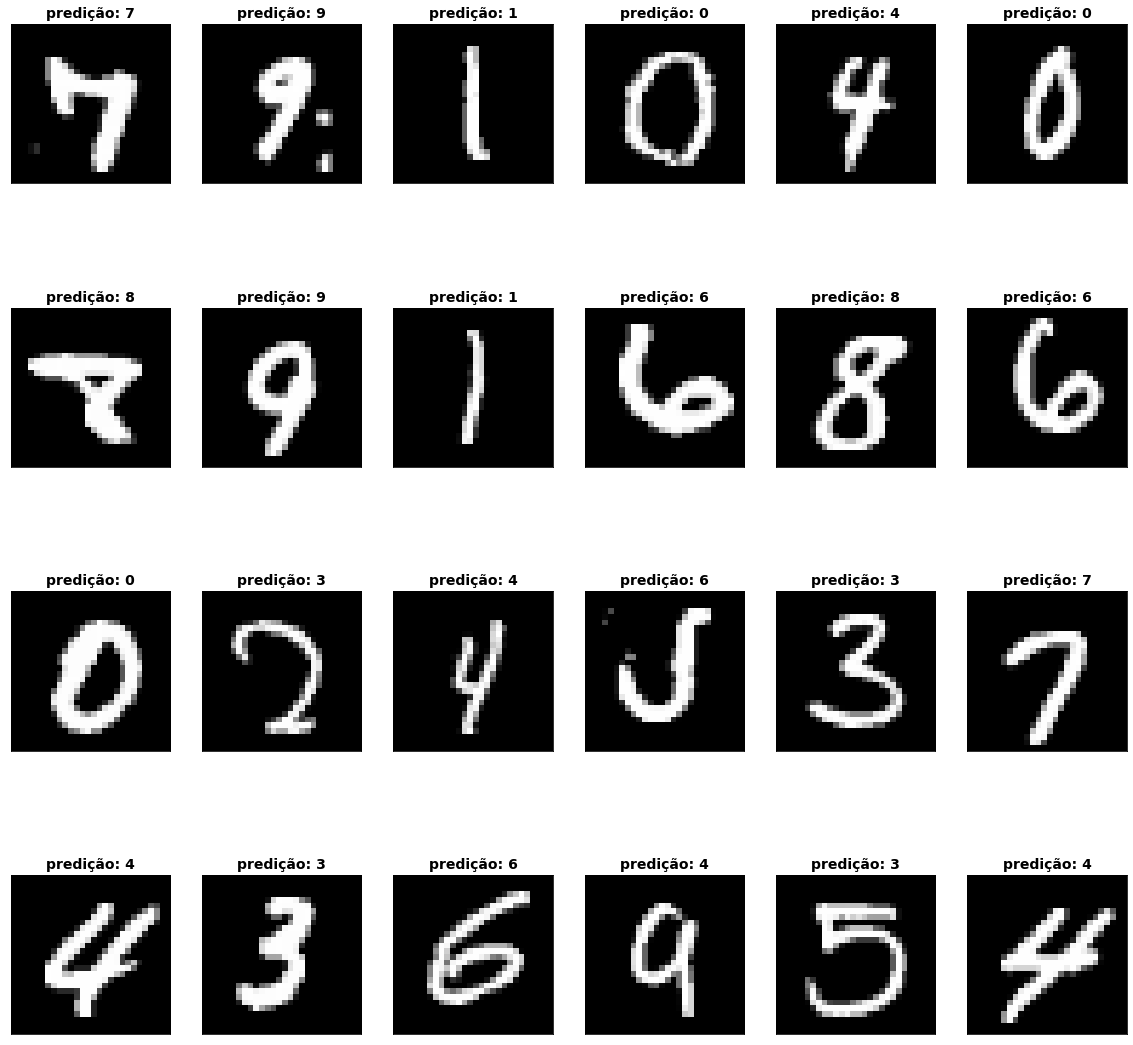

In [108]:
random_idx = np.random.randint(0,Xtest.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtest[idx_i, :].reshape(28,28)
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("predição: "+str( int(logreg.predict(Xtest[idx_i, :].reshape(1, -1))[0]) ), fontsize = 14, fontweight = 'bold')
plt.show()